# Actividad en clase: Explorando la información

Juan Pablo Bernal Lafarga - A01742342

El RMS Titanic zarpó en su viaje inaugural en 1912, cruzando el Atlántico desde Southampton, Inglaterra, hasta la ciudad de Nueva York. El barco nunca completó el viaje, hundiéndose hasta el fondo del océano Atlántico después de chocar con un iceberg, derribando a 1.502 de los 2.224 pasajeros a bordo. En este proyecto, creará un modelo de regresión logística que prediga qué pasajeros sobrevivieron al
hundimiento del Titanic, en función de características como la edad y la clase. Kaggle proporciona los datos que usaremos para entrenar nuestro modelo. ¡Siéntete libre de mejorar el modelo por tu cuenta y enviarlo a la competencia Kaggle Titanic!

Realiza las siguientes actividades. Proporciona algunos elementos visuales (gráficas) que permitan observar los datos obtenidos y elabora una libreta con el código empleado para esta actividad.

## Cargar los datos

1. En una nueva libreta, en la plataforma Kaggle, importa los datos de la competencia 'Titanic - Machine Learning from Disaster'. A partit del archivo 'train.csv', crea un marco de datos 'passengers'. Imprime la
cabecera de este marco e inspecciona las columnas.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

passengers = pd.read_csv('train.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Menciona datos descriptivos de la fuente de información analizada: cantidad de datos, tipo de datos, rangos, y distribucinos observadas. ¿Que variables categóricas encuentras?

In [64]:
passengers.describe() #Cantidad de datos, máximos y mínimos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
passengers.info() #Tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

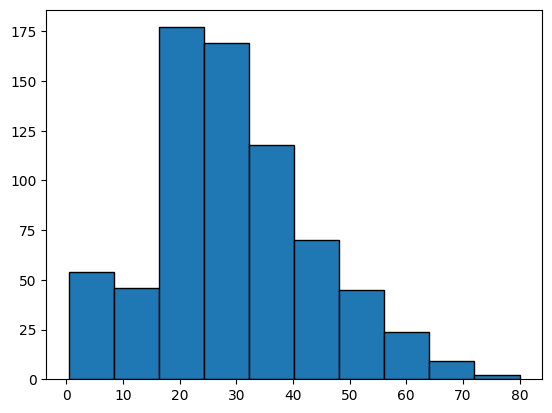

In [66]:
plt.hist(passengers['Age'], bins=10, edgecolor='black')

La edad muestra una distribución con aparente sesgo a la derecha, por lo que bien podríamos pensar que es una distribución F o Chi cuadrada

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

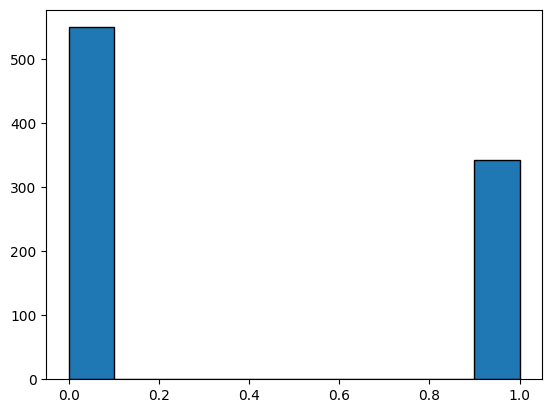

In [67]:
plt.hist(passengers['Survived'], bins=10, edgecolor='black')

Los supervivientes no muestran ningún tipo de disrtibución al tener únicamente 2 resultados.

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

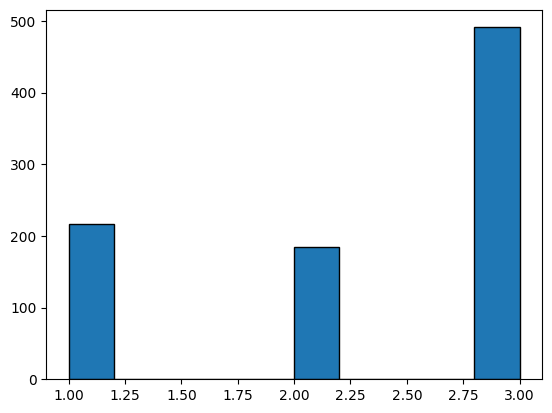

In [68]:
plt.hist(passengers['Pclass'], bins=10, edgecolor='black')

El tipo de ticket tampoco muestra algún tipo de distribución

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

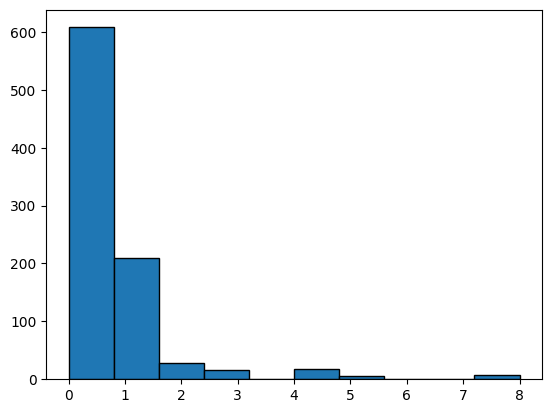

In [69]:
plt.hist(passengers['SibSp'], bins=10, edgecolor='black')

El número de hermanos muestra una aparente distribución con sesgo hacia la derecha, por lo que se puede pensar en una distribución F o de Chi Cuadrada

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

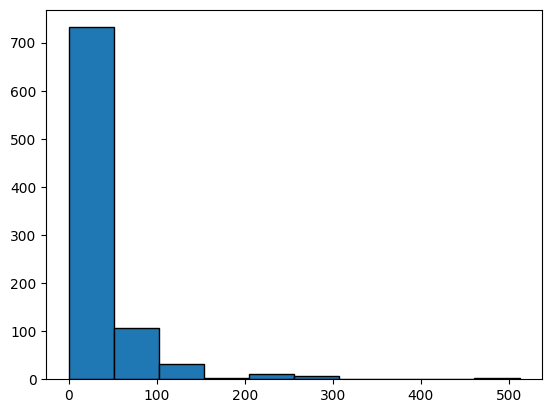

In [70]:
plt.hist(passengers['Fare'], bins=10, edgecolor='black')

Y por último, la tarifa por pasajero también aparenta la forma de una distribución con sesgo a la derecha, por lo que se puede pensar en una distribución F o de Chi Cuadrada

Las variables categóricas de la base de datos son:

    Survived: Nos dice si sobrevivió o no
    Pclass: Te dice qué tipo de ticket compró el pasajero
    Sex: Representa el sexo del pasajero
    Embarked: Te dice en cuál de los 3 puertos se subió el pasajero


3. Proporciona una justificación para la siguiente respuesta ¿Qué características serías más útiles para predecir la supervivencia de un pasajero? 

Considero que las características más útiles son:

    Age: La edad es un factor que nos puede dar una idea de la capacidad física de la persona para reaccionar ante la situación
    Sex: El sexo también es un indicador de capacidad física, pero a la vez influye de manera social para decidir a quién salvar prioritariamente.
    Fare: La tarifa pagada por el pasajero puede ser útil, pues podría ser que sobrevivieran los que más pagaron debido a que fueron ayudados.
    Cabin: La cabina en la que estaba el pasajero también es importante. Si el pasajero se encontraba en el lado que se hundió primero, entonces tendría menos probabilidades de sobrevivir.
    Parch: Por último, el número de niños también es importante, pues seguramente se les intento dar prioridad.

<ipython-input-71-3e76675c4e23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = label_encoder.fit_transform(data['Sex'])


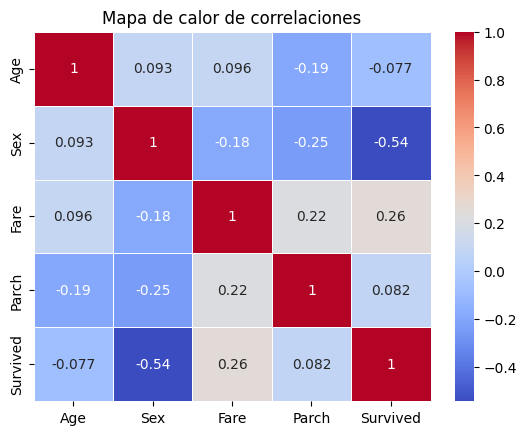

In [71]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

data = passengers[['Age', 'Sex', 'Fare', 'Parch','Survived']]
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
passengers['Sex'] = label_encoder.fit_transform(passengers['Sex'])

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir título
plt.title('Mapa de calor de correlaciones')

# Mostrar gráfico
plt.show()

En el heat map se observa la correlación entre variables, pero centrémonos en la fila de Survived. Ahí podemos notar que las variables mayor correlacionadas con la supervivencia son el sexo (Sex) y la tarifa pagada (Fare), por lo que serían características importantes para la razón de su supervivencia.

## Limpiar los datos

1. Analiza las variables relevantes que has considerado. ¿Cuales de ellas tienen problemas con información? (Datos faltantes, incorrectos).

In [72]:
print(passengers.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Las variables con datos faltantes son Age, Cabin y Embarked.

2. Dado el dicho, "las mujeres y los niños primero", el sexo y la edad parecen ser buenas características para predecir la supervivencia. Mapeemos los valores de texto en la columna Sex a un valor numérico. Actualice 'Sex' de modo que todos los valores femeninos se reemplacen con 1 y todos los valores masculinos se reemplacen con 0.

In [73]:
passengers['Sex'].head()

,Sex
0,1
1,0
2,0
3,0
4,1


In [74]:
data['Sex'].head()

,Sex
0,1
1,0
2,0
3,0
4,1


3. Echemos un vistazo a la edad. Imprima passengers['Age'].values. Puede ver que tenemos varios valores faltantes, o nans. Rellene todos los valores de edad vacíos en pasajeros con la edad media.

In [75]:
passengers['Age'].isnull().sum() # Hay 177 datos faltantes

177

In [76]:
passengers['Age'].fillna(passengers['Age'].mean(), inplace=True)
passengers['Age'].isnull().sum()

0

Con la función .fillna y .mean se rellenaron los datos faltantes con la edad promedio de los pasajeros y ya no quedan datos faltantes.

4. Provee una gráfica de barras que permita observar la relación entre sobrevivientes y su género. ¿Observas alguna tendencia?

<Axes: xlabel='Sex', ylabel='Count'>

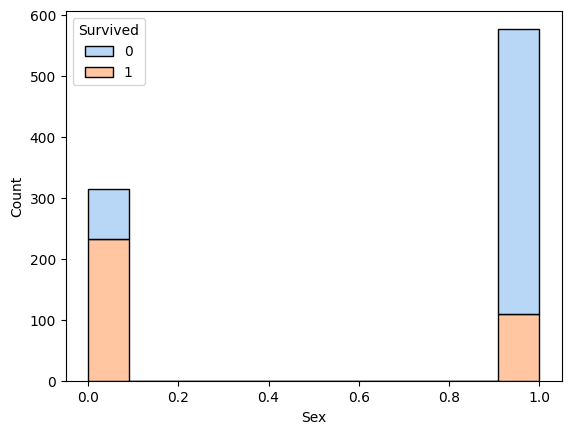

In [77]:
sns.histplot(x='Sex', hue='Survived', data=passengers, multiple='stack', palette='pastel')

El número de hombres a bordo era casi del doble del número de mujeres, y el mayor número de bajas se dio en los hombres.
Murieron más hombres que mueres, y además, sobrevivieron más mujeres que hombres. Así que podemos inferir que se le dio prioridad a salvar a las mujeres

## Exploración fuera de clase

Histograma de la tarifa pagada y su relación con la supervivencia

<Axes: xlabel='Fare', ylabel='Count'>

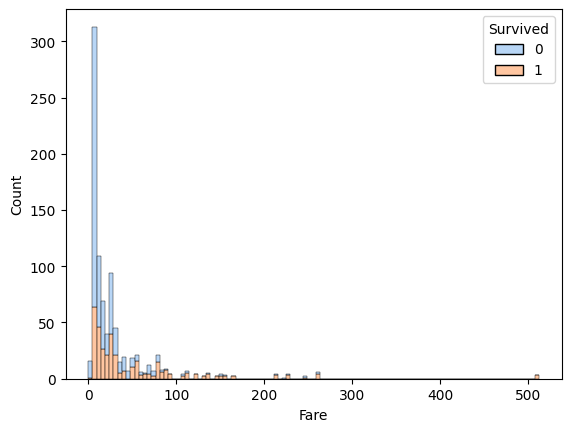

In [78]:
sns.histplot(x='Fare', hue='Survived', data=passengers, multiple='stack', palette='pastel')

Histograma de la clase del ticket con la supervivencia

<Axes: xlabel='Pclass', ylabel='Count'>

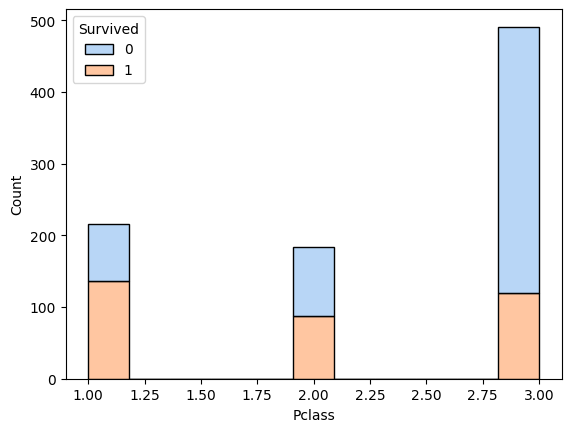

In [79]:
sns.histplot(x='Pclass', hue='Survived', data=passengers, multiple='stack', palette='pastel')

Modelos de regresión lineal múltiple

In [88]:
import statsmodels.api as sm

X = passengers[['Age','Sex','Pclass']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.410
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              205.7
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   2.67e-101
Time:                        18:45:11   Log-Likelihood:                         -602.60
No. Observations:                 891   AIC:                                      1211.
Df Residuals:                     888   BIC:                                      1226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
X = passengers[['Age','Sex','Fare']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.416
Method:                 Least Squares   F-statistic:                              212.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   6.80e-104
Time:                        18:46:01   Log-Likelihood:                         -596.59
No. Observations:                 891   AIC:                                      1199.
Df Residuals:                     888   BIC:                                      1214.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [90]:
X = passengers[['Age','Sex','Pclass','Fare']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.477
Method:                 Least Squares   F-statistic:                              203.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   5.23e-124
Time:                        18:46:17   Log-Likelihood:                         -547.16
No. Observations:                 891   AIC:                                      1102.
Df Residuals:                     887   BIC:                                      1121.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
X = passengers[['Age','Sex','Pclass','Parch']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              157.7
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   6.38e-102
Time:                        18:47:02   Log-Likelihood:                         -598.39
No. Observations:                 891   AIC:                                      1205.
Df Residuals:                     887   BIC:                                      1224.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [93]:
X = passengers[['Age','Sex','Pclass','SibSp']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.408
Method:                 Least Squares   F-statistic:                              154.7
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   2.16e-100
Time:                        18:47:35   Log-Likelihood:                         -601.94
No. Observations:                 891   AIC:                                      1212.
Df Residuals:                     887   BIC:                                      1231.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [94]:
X = passengers[['Age','Sex','Pclass','Fare','SibSp','Parch']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              137.2
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   9.39e-123
Time:                        18:48:23   Log-Likelihood:                         -544.70
No. Observations:                 891   AIC:                                      1101.
Df Residuals:                     885   BIC:                                      1130.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [95]:
X = passengers[['Age','Sex','Pclass','Fare','SibSp']]  # Variable independiente
y = passengers['Survived']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              164.8
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                   7.07e-124
Time:                        18:48:56   Log-Likelihood:                         -544.72
No. Observations:                 891   AIC:                                      1099.
Df Residuals:                     886   BIC:                                      1123.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El mejor modelo se obtuvo con las variables Age, Sex, Pclass, Fare, y SibSp, con una R^2 de 0.48